In [1]:
!ls ../autopager/data/

data_all.csv  html_all	test_data  test_yuching


In [2]:
import pandas as pd
from os import listdir
import sys
from sklearn import preprocessing
import numpy as np
from urllib.parse import quote, unquote
from parsel import Selector
sys.path.insert(0, '..')

In [3]:
from autopager.parserutils import (TagParser, MyHTMLParser, draw_scaled_page, position_check, compare_tag)

In [3]:
csv_dir = "../autopager/data/"
html_dir = "../autopager/data/html_all/"
data = pd.read_csv(csv_dir+'data_all.csv')

In [5]:
csv_dir = "../autopager/data/test_yuching/"
html_dir = "../autopager/data/test_yuching/html/"
data = pd.read_csv(csv_dir+'test_data.csv')

In [4]:
csv_dir = "../autopager/data/test_data/"
html_dir = "../autopager/data/test_data/html/"
data = pd.read_csv(csv_dir+'test_data.csv')

In [5]:
data = data.fillna('N/A')

In [6]:
data = data[data['Checked']=='T']

In [7]:
data['File Name'] = data['File Name'].astype(int)

In [8]:
data['File Name'] = data['File Name'].astype(str)

## Block for testing selector via specific file

In [9]:
tagParser = TagParser()
parser = MyHTMLParser()

In [10]:
f = open(html_dir+"3"+".html", "r", encoding="UTF-8")
file = f.read()

In [11]:
parser._reset()
parser.feed(file)

In [12]:
fixed_page = parser.get_scaled_page()

In [13]:
fixed_page

[(0.02059202059202059, 0.10975609756097561),
 (0.03088803088803089, 0.1133816743572841),
 (0.036036036036036036, 0.11404087013843112),
 (0.036036036036036036, 0.11437046802900461),
 (0.036036036036036036, 0.11470006591957811),
 (0.036036036036036036, 0.11799604482531312),
 (0.03088803088803089, 0.11931443638760711),
 (0.05276705276705276, 0.12261041529334211),
 (0.02574002574002574, 0.12326961107448912),
 (0.02574002574002574, 0.12359920896506262),
 (0.02574002574002574, 0.12392880685563612),
 (0.02574002574002574, 0.12425840474620962),
 (0.02574002574002574, 0.12458800263678312),
 (0.02574002574002574, 0.1249176005273566),
 (0.02574002574002574, 0.1252471984179301),
 (0.02574002574002574, 0.1255767963085036),
 (0.02574002574002574, 0.1259063941990771),
 (0.02574002574002574, 0.1262359920896506),
 (0.015444015444015444, 0.1275543836519446),
 (0.023166023166023165, 0.1282135794330916),
 (0.023166023166023165, 0.1285431773236651),
 (0.028314028314028312, 0.1292023731048121),
 (0.03346203

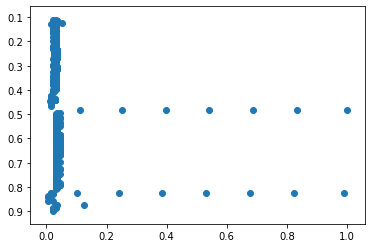

In [14]:
draw_scaled_page(fixed_page)

## Test selector get position

In [73]:
f = open(html_dir+"1"+".html", "r", encoding="UTF-8")
file = f.read()

In [74]:
parser._reset()
parser.feed(file)

In [75]:
selector = Selector(text=file)
extracted_data = selector.css("#WebPager1 > div:nth-child(2) > a:nth-child(2)")

In [76]:
extracted_data.extract()

['<a disabled style="margin-right:10px;">&lt;</a>']

In [77]:
for extract_data in extracted_data:
    tagParser.feed(extract_data.extract())
    tag_info = tagParser.pop_first_and_reset()
    print(f"Now finding: {tag_info}")
    print("-------------------------")
    is_find = False
    for node in parser.start_tags:
        node_tag = node[0]
        node_attr = node[2]
        if node_tag == tag_info[0]:
            if node_attr == tag_info[1]:
#                 print(node)
                is_find = True
    if not is_find:
        print("Not found")
    else:
        print("found")
    print("-------------------------")

Now finding: ('a', [('disabled', None), ('style', 'margin-right:10px;')])
-------------------------
Not found
-------------------------


In [48]:
for node in parser.start_tags:
    node_tag = node[0]
    node_attr = node[2]
    if node_tag == tag_info[0]:
        if node_attr == tag_info[1]:
            print(node)

('a', (288, 331), [('href', '/en/discussions'), ('class', ' Pager-p p-1 FirstPage'), ('aria-label', 'Page 1'), ('tabindex', '0')])
('a', (1037, 276), [('href', '/en/discussions'), ('class', ' Pager-p p-1 FirstPage'), ('aria-label', 'Page 1'), ('tabindex', '0')])


## Mapping html to parser

In [33]:
f = open(html_dir+"3"+".html", "r", encoding="UTF-8")
file = f.read()

In [34]:
selector = Selector(text=file)
x_seq = selector.xpath(".//a|.//button").extract()

In [35]:
parser._reset()
parser.feed(file)

In [39]:
just_a_button = [data for data in parser.start_tags if data[0] == 'a' or data[0] == 'button']

In [45]:
tag_positions = parser.get_scaled_page()

In [46]:
len(tag_positions)

797

In [47]:
len(x_seq)

797

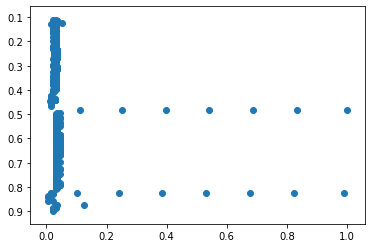

In [44]:
draw_scaled_page(tag_positions)

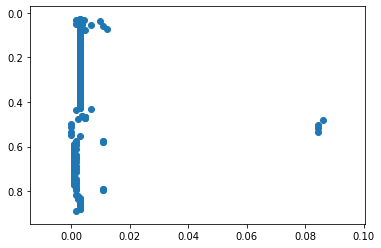

In [20]:
draw_scaled_page(tag_positions)

In [28]:
i = 0
while i < len(x_seq):
    tagParser.feed(x_seq[i])
    tag_info = tagParser.pop_first_and_reset()
    parsed_node = just_a_button[i]
    if not compare_tag(tag_info, parsed_node):
        print(i, tag_info, parsed_node)
    i+=1
print(f"len x_seq: {len(x_seq)}, i: {i}")

len x_seq: 678, i: 678


In [29]:
tagParser.feed(x_seq[0])
tag_info = tagParser.pop_first_and_reset()
print(tag_info)

('a', [('href', '/')])


In [30]:
test_jb = just_a_button[0]
print(test_jb)

('a', (304, 16), [('href', '/')])


In [31]:
compare_tag(tag_info, test_jb)

True

In [10]:
def compare_tag(tag_info, parsed_node):
    if tag_info[0] == parsed_node[0]:
        if len(tag_info[1]) == len(parsed_node[2]):
            if len(tag_info[1]) == 0:
                return True
            for attr_a, attr_b in zip(tag_info[1], parsed_node[2]):
                if attr_a[0] == attr_b[0]:
                    if attr_a[0] == 'href':
#                         if attr_a[1] == attr_b[1].replace(" ","%20") or attr_a[1] == attr_b[1].replace(" ",""):
                        if unquote(attr_a[1]) == unquote(attr_b[1]):
                            return True
                    else:
                        return True
    else:
        return False

In [11]:
def position_check(file, parser, tagParser):
    selector = Selector(text=file)
    x_seq = selector.xpath(".//a|.//button").extract()
    parser._reset()
    parser.feed(file)
    just_a_button = [data for data in parser.start_tags if data[0] == 'a' or data[0] == 'button']
    if len(x_seq) == len(just_a_button):
        return True
    if len(x_seq) > len(just_a_button):
        print(f"Size of x_seq({len(x_seq)}) smaller than just_a_button({len(just_a_button)})!")
        return False
    i = 0
    i = 0
    while i < len(x_seq):
        tagParser.feed(x_seq[i])
        tag_info = tagParser.pop_first_and_reset()
        parsed_node = just_a_button[i]
        if not compare_tag(tag_info, parsed_node):
            return False
        i+=1
    return True

## Test Some Selector

In [138]:
root = Selector(file)
# selector = selector.xpath(".//button")
# print(selector.extract())
extracted_data = selector.css(".pagination li:not(:nth-last-child(2)):not(:nth-child(2)) > button.ng-scope").extract()
print(extracted_data)

[]


In [139]:
for el in selector.xpath(".//*[not(child::*)]"):
    links_parent = el.xpath('ancestor::a|ancestor::button')
    if links_parent:
        continue
        for link in links_parent:
            print(link.extract())
    else:
        for link in el.css('a'):
            print(link.extract())
        for link in el.css('button'):
            print(link.extract())

<a class="ct-overlay-a" target="_blank" href="https://cuttime.net/?utm_source=jwpepperbanner&amp;utm_medium=internal&amp;utm_campaign=your-complete-solution"></a>
<button class="close-ct">✕</button>
<a href="/sheet-music/services-cares.jsp">Need Help? 1-800-345-6296</a>
<a href="/sheet-music/events">Events</a>
<a href="/sheet-music/regional/local-connections.jsp">Local Connections</a>
<a href="/sheet-music/accounts/cart-history.jsp?link=header" class="loginRequired mainmenuitem">My Account</a>
<a href="/sheet-music/accounts/cart-history.jsp?link=menu" class="loginRequired subcategoryofmain">Orders and Tracking</a>
<a href="/sheet-music/carts/saved-carts.jsp" class="loginRequired subcategoryofmain">Saved Web Carts</a>
<a href="/sheet-music/accounts/payment.jsp?link=header&amp;currentAccount=" class="myaccount-login subcategoryofmain">Make a Payment</a>
<a href="/sheet-music/services-bookkeeper.jsp" class="myaccount-links mainmenuitem">Bookkeeper Account</a>
<a href="https://jwpepper1876

## Function to loop file for testing

In [26]:
def check_file_wellDownloaded(data, parser):
    for idx,row in data.iterrows():
        index = row['File Name']
        page_selector = row['PREV']
        encoding = row['Encoding']
        f = open(html_dir+index+".html", "r", encoding=encoding)
        file = f.read()
        parser.feed(file)
        print(f"Index: {index}, Tag size: {len(parser.start_tags)}, Well Download: {parser.wellDownloaded}")
        parser._reset()

In [27]:
check_file_wellDownloaded(data, parser)

Index: 1, Tag size: 2711, Well Download: True
Index: 2, Tag size: 1418, Well Download: True
Index: 3, Tag size: 657, Well Download: True
Index: 4, Tag size: 3258, Well Download: True
Index: 5, Tag size: 755, Well Download: True
Index: 6, Tag size: 3686, Well Download: True
Index: 7, Tag size: 3739, Well Download: True
Index: 8, Tag size: 101, Well Download: True
Index: 9, Tag size: 1542, Well Download: True
Index: 10, Tag size: 1838, Well Download: True
Index: 11, Tag size: 2278, Well Download: True
Index: 12, Tag size: 2639, Well Download: True
Index: 13, Tag size: 2657, Well Download: True
Index: 14, Tag size: 855, Well Download: True
Index: 15, Tag size: 843, Well Download: True
Index: 16, Tag size: 458, Well Download: True
Index: 17, Tag size: 518, Well Download: True
Index: 18, Tag size: 526, Well Download: True
Index: 19, Tag size: 522, Well Download: True
Index: 20, Tag size: 666, Well Download: True
Index: 21, Tag size: 520, Well Download: True
Index: 22, Tag size: 680, Well Do

Index: 187, Tag size: 1356, Well Download: True
Index: 188, Tag size: 605, Well Download: True
Index: 189, Tag size: 578, Well Download: True
Index: 190, Tag size: 1181, Well Download: True
Index: 191, Tag size: 1150, Well Download: True
Index: 192, Tag size: 1143, Well Download: True
Index: 193, Tag size: 522, Well Download: True
Index: 194, Tag size: 499, Well Download: True
Index: 195, Tag size: 531, Well Download: True
Index: 196, Tag size: 1363, Well Download: True
Index: 197, Tag size: 924, Well Download: True
Index: 198, Tag size: 925, Well Download: True
Index: 199, Tag size: 542, Well Download: True
Index: 200, Tag size: 952, Well Download: True
Index: 201, Tag size: 575, Well Download: True
Index: 202, Tag size: 572, Well Download: True
Index: 203, Tag size: 1506, Well Download: True
Index: 204, Tag size: 1509, Well Download: True
Index: 205, Tag size: 1454, Well Download: True
Index: 206, Tag size: 1238, Well Download: True
Index: 207, Tag size: 2601, Well Download: True
Ind

In [13]:
def check_for_position_mapping(data, parser, tagParser):
    print("Error List: ")
    for idx,row in data.iterrows():
        index = row['File Name']
        encoding = row['Encoding']
        f = open(html_dir+index+".html", "r", encoding=encoding)
        file = f.read()
        if position_check(file, parser, tagParser) != True:
            print(f"Index: {index}, Encoding: {encoding}")
    return

In [16]:
check_for_position_mapping(data, parser, tagParser)

Error List: 


In [79]:
def extract_data(index, selector_list, encoding):
    has_wa = False
    f = open(html_dir+index+".html", "r", encoding=encoding)
    file = f.read()
    selector = Selector(text=file)
    data_list = []
    for css_selector in selector_list:
        extracted_data = selector.css(css_selector).extract()
        if len(extracted_data) == 0:
            has_wa = True
        data_list.append(extracted_data)
    if has_wa:
        return []
    else:
        return data_list

In [80]:
# Prev
Failed = []
Page_failed = []
for idx,row in data.iterrows():
    index = row['File Name']
    page_selector = row['PREV']
    encoding = row['Encoding']
    if page_selector == 'N/A':
        continue
    else:
        page_selector = page_selector.split(',')
    try:
        data_list = extract_data(index, page_selector, encoding)
    except Exception as e:
        Failed.append(index)
        print(e)
        continue
    if len(data_list)==0:
        Page_failed.append(index)
print(f"Failed: {Failed}")
print(f"Page_failed: {Page_failed}")

Failed: []
Page_failed: []


In [81]:
# Page
Failed = []
Page_failed = []
for idx,row in data.iterrows():
    index = row['File Name']
    page_selector = row['PAGE']
    encoding = row['Encoding']
    if page_selector == 'N/A':
        continue
    else:
        page_selector = page_selector.split(',')
    try:
        data_list = extract_data(index, page_selector, encoding)
    except:
        Failed.append(index)
        continue
    if len(data_list)==0:
        Page_failed.append(index)
print(f"Failed: {Failed}")
print(f"Page_failed: {Page_failed}")

Failed: []
Page_failed: []


In [82]:
# Next
Failed = []
Page_failed = []
for idx,row in data.iterrows():
    index = row['File Name']
    page_selector = row['NEXT']
    encoding = row['Encoding']
    if page_selector == 'N/A':
        continue
    else:
        page_selector = page_selector.split(',')
    try:
        data_list = extract_data(index, page_selector, encoding)
    except:
        Failed.append(index)
        continue
    if len(data_list)==0:
        Page_failed.append(index)
print(f"Failed: {Failed}")
print(f"Page_failed: {Page_failed}")

Failed: []
Page_failed: []


In [83]:
# Last
Failed = []
Page_failed = []
for idx,row in data.iterrows():
    index = row['File Name']
    page_selector = row['LAST']
    encoding = row['Encoding']
    if page_selector == 'N/A':
        continue
    else:
        page_selector = page_selector.split(',')
    try:
        data_list = extract_data(index, page_selector, encoding)
    except:
        Failed.append(index)
        continue
    if len(data_list)==0:
        Page_failed.append(index)
print(f"Failed: {Failed}")
print(f"Page_failed: {Page_failed}")

Failed: []
Page_failed: []


In [84]:
# First
Failed = []
Page_failed = []
for idx,row in data.iterrows():
    index = row['File Name']
    page_selector = row['FIRST']
    encoding = row['Encoding']
    if page_selector == 'N/A':
        continue
    else:
        page_selector = page_selector.split(',')
    try:
        data_list = extract_data(index, page_selector, encoding)
    except:
        Failed.append(index)
        continue
    if len(data_list)==0:
        Page_failed.append(index)
print(f"Failed: {Failed}")
print(f"Page_failed: {Page_failed}")

Failed: []
Page_failed: []
